# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [10]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [44]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


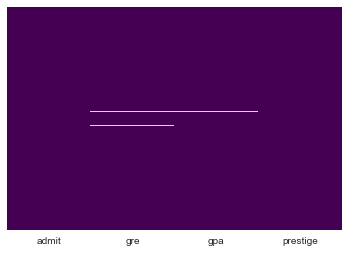

In [45]:
sns.heatmap(df_raw.isnull(),yticklabels=False,cbar=False,cmap='viridis') #shows missing values

## Questions
#### Question 1. How many observations are in our dataset? 


In [12]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [13]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: STD is the root of variation, obviously variation of GPA is much less than GRE, since the range of GPA is only 1-4.

#### Question 4. Drop data points with missing data


In [14]:
df_raw.dropna(inplace=True)
df_raw

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: by visualizing if there is any other missing value left.

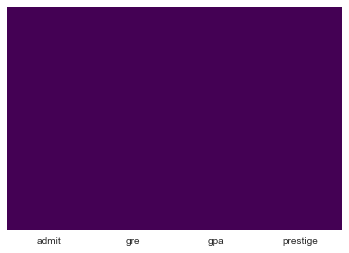

In [15]:
sns.heatmap(df_raw.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Question 6. Create box plots for GRE and GPA

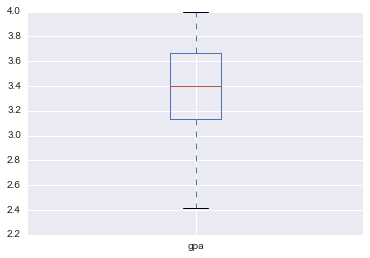

In [22]:
#boxplot 1
df_raw['gpa'].plot(kind='box')

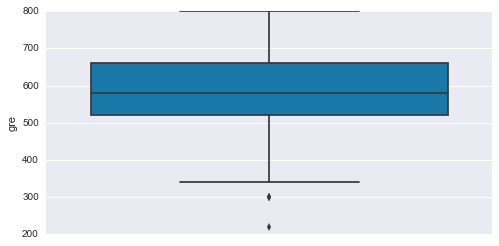

In [21]:
#boxplot 2 
plt.figure(figsize=(8, 4))
sns.boxplot(y='gre',data=df_raw,palette='winter')

#### Question 7. What do this plots show?

Answer: distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum.

#### Question 8. Describe each distribution 


GRE distribution: median 580, minimum 320, maximum > 800, first quartile 510 and third quartile 660.
GPA distribution: median 3.4, minimum 2.4, maximum 4, first quartile 3.2 and third quartile 3.6.



#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, according to empirical rule (68-95-99.7) 

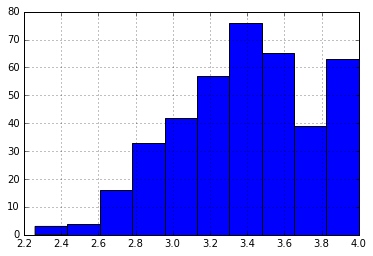

In [8]:
df_raw['gpa'].hist()


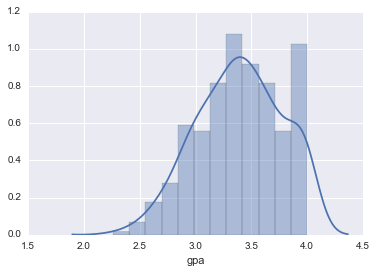

In [29]:
sns.distplot(df_raw.gpa);

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: we can get log(data) to correct data.

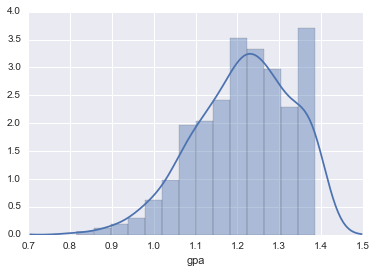

In [35]:
sns.distplot(np.log(df_raw.gpa));

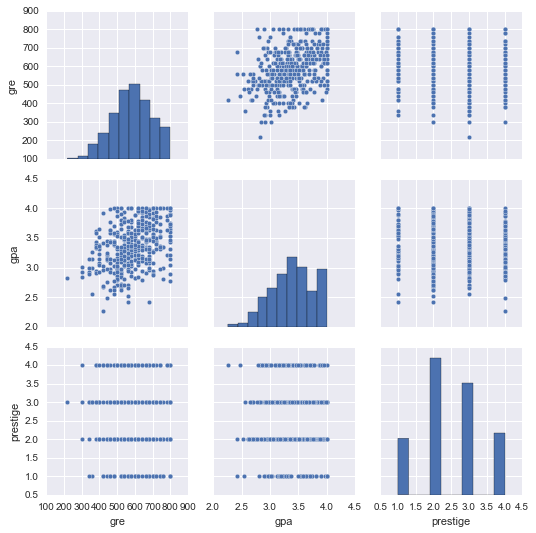

In [37]:
sns.pairplot(df_raw.drop("admit", axis=1)) # see correlation between predicators by seaborn

#### Question 11. Which of our variables are potentially colinear?  Looks GRE and GPA

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


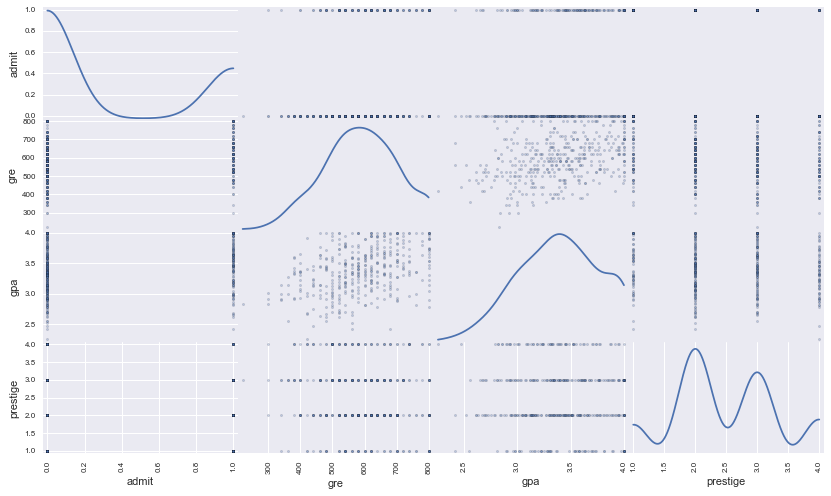

In [26]:
# create a correlation matrix for the data
# df_raw.drop(['admit'], axis = 1, inplace = True)

pd.scatter_matrix(df_raw, alpha = 0.3, figsize = (14,8), diagonal = 'kde'); 
df_raw.corr()

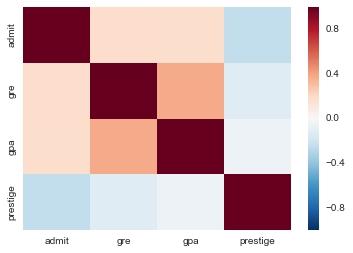

In [38]:
sns.heatmap(df_raw.corr()); # gre and gpa look more colinear


#### Question 12. What did you find?

Answer: Looks like there is no colinear between the predicators

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Our goal will be to identify the various factors that may influence admission into graduate school.
The dataset contains several columns which we can use as predictor variables:
gpa, gre score, rank or prestige of an applicant's undergraduate alma mater
The fourth column, admit, is our binary target variable. It indicates whether or not a candidate was admitted our not.

#### Question 14. What is your hypothesis? 

Answer: There is an alternative hypothesis. There is relationship between predicator and outcome which is admit field.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data: 

C:\Users\zyousefi.ORADEV\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\zyousefi.ORADEV\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


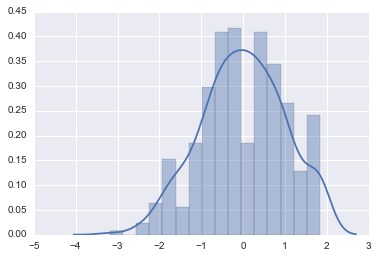

In [42]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# use the "fit_transform" function to normalize the X design matrix
Xn = ss.fit_transform(df_raw.gre)

sns.distplot(Xn);


#### 3. Advanced: Impute missing data

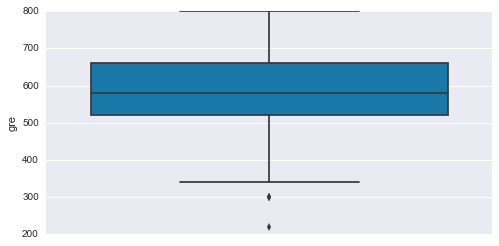

In [46]:
plt.figure(figsize=(8, 4))
sns.boxplot(y='gre',data=df_raw,palette='winter')

In [47]:
def impute_gre(cols):
    gre = cols[0]
    
    if pd.isnull(gre):
            return 580
    else:
        return gre

In [49]:
df_raw['gre'] = df_raw[['gre']].apply(impute_gre,axis=1) #replace missing values with average(mean)shown in the above diagram
#we can do the same for gpa

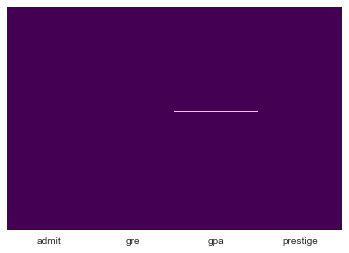

In [50]:
sns.heatmap(df_raw.isnull(),yticklabels=False,cbar=False,cmap='viridis') # will see gre doesn't have any missing value anymore